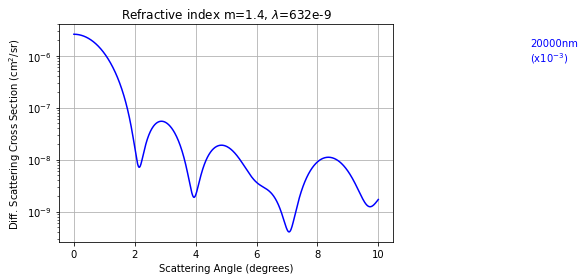

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
  
try:
    import miepython

except ModuleNotFoundError:
    print('miepython not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

    
workbook = xlsxwriter.Workbook('E:\Stage\Example3.xlsx')
worksheet = workbook.add_worksheet()
  
# Start from the first cell.
# Rows and columns are zero indexed.
row = 0
column = 0



m = 1.33-0j
lambda0 = 632e-9  # m
theta = np.linspace(0,10,1000)
mu = np.cos(theta* np.pi/180)

d = 20000e-9        # m
x = 2 * np.pi/lambda0 * d/2
geometric_cross_section = np.pi * d**2/4 * 1e4  # cm**2
qext, qsca, qback, g = miepython.mie(m,x)
sigma_sca = geometric_cross_section * qext * miepython.i_unpolarized(m,x,mu)
plt.semilogy(theta, sigma_sca*1e-3, color='blue')
plt.text(15, sigma_sca[0]*3e-4, "%.0fnm\n(x10$^{-3}$)" % (d*1e9), color='blue')


plt.title("Refractive index m=1.4, $\lambda$=632e-9")
plt.xlabel("Scattering Angle (degrees)")
plt.ylabel("Diff. Scattering Cross Section (cm$^2$/sr)")
plt.grid(True)
plt.show()

row = 0

# iterating through content list
for item in sigma_sca :
  
    # write operation perform
    worksheet.write(row, column, item)
  
    # incrementing the value of row by one
    # with each iteratons.
    row += 1
      
workbook.close()

#print('Datapoints theta')
#print(theta)
#print('Datapoints sigma')
#print(sigma_sca)